# Divisive Hierarchial Clustering:
Divisive Clustering is a type of hierarchical clustering that follows a top-down approach. It starts by placing all data points into one large cluster and then recursively splits that cluster into smaller ones based on differences or distances between the points. This process continues until each cluster contains only similar data points or meets a stopping condition. It is the opposite of agglomerative clustering, which builds clusters from the bottom up. It is is useful when we want to break down a broad category into smaller, meaningful groups.

In [10]:
# import important libraries:
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import make_blobs
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [11]:
# Helper: Euclidean Distance
# ---------------------------------------
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))


# ---------------------------------------
# Compute Average Dissimilarity (Intra-cluster)
# ---------------------------------------
def cluster_dissimilarity(cluster):
    if len(cluster) < 2:
        return 0
    distances = cdist(cluster, cluster, 'euclidean')
    return np.mean(distances)
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [12]:
# Split a Cluster into Two
# -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def split_cluster(cluster):
    distances = cdist(cluster, cluster, 'euclidean')
    avg_distances = np.mean(distances, axis=1)
    split_point_index = np.argmax(avg_distances)

    new_cluster = [cluster[split_point_index]]
    remaining = [cluster[i] for i in range(len(cluster)) if i != split_point_index]

    for point in remaining:
        d_to_new = np.mean(cdist([point], np.array(new_cluster)))
        d_to_old = np.mean(cdist([point], np.array(remaining)))
        if d_to_new < d_to_old:
            new_cluster.append(point)

    new_cluster = np.array(new_cluster)
    old_cluster = np.array([p for p in cluster if list(p) not in new_cluster.tolist()])

    return old_cluster, new_cluster
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [13]:
# Divisive Clustering with Dendrogram Tracking
# ---------------------------------------
def divisive_clustering(X, k=2):
    clusters = [X]
    cluster_ids = [0]  # Assign IDs to clusters
    next_cluster_id = 1

    # To store linkage-like information: [parent_id, left_child_id, right_child_id, dissimilarity]
    hierarchy = []

    while len(clusters) < k:
        # Find cluster with max dissimilarity
        dissimilarities = [cluster_dissimilarity(c) for c in clusters]
        idx_to_split = np.argmax(dissimilarities)
        cluster_to_split = clusters.pop(idx_to_split)
        parent_id = cluster_ids.pop(idx_to_split)

        # Split into two sub-clusters
        c1, c2 = split_cluster(cluster_to_split)

        # Add to lists
        clusters.append(c1)
        clusters.append(c2)
        left_id, right_id = next_cluster_id, next_cluster_id + 1
        next_cluster_id += 2

        cluster_ids.append(left_id)
        cluster_ids.append(right_id)

        hierarchy.append([parent_id, left_id, right_id, dissimilarities[idx_to_split]])

    return clusters, hierarchy
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

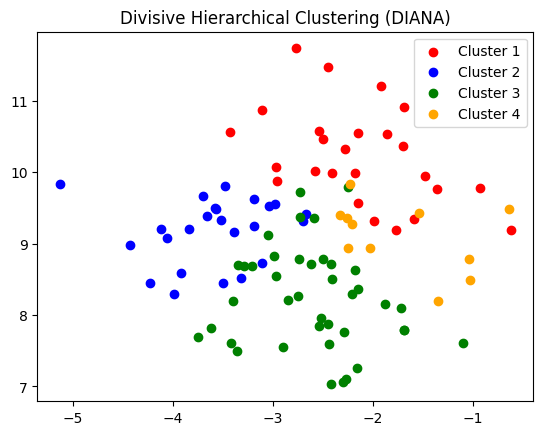

In [14]:
# Plot Clusters (2D Visualization)
# ---------------------------------------
def plot_clusters(clusters):
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']
    for i, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i % len(colors)], label=f'Cluster {i+1}')
    plt.title('Divisive Hierarchical Clustering (DIANA)')
    plt.legend()
    plt.show()


# ---------------------------------------
# Run on synthetic data
# ---------------------------------------
X, _ = make_blobs(n_samples=100, centers=1, n_features=2, random_state=42)

clusters, hierarchy = divisive_clustering(X, k=4)
plot_clusters(clusters)
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

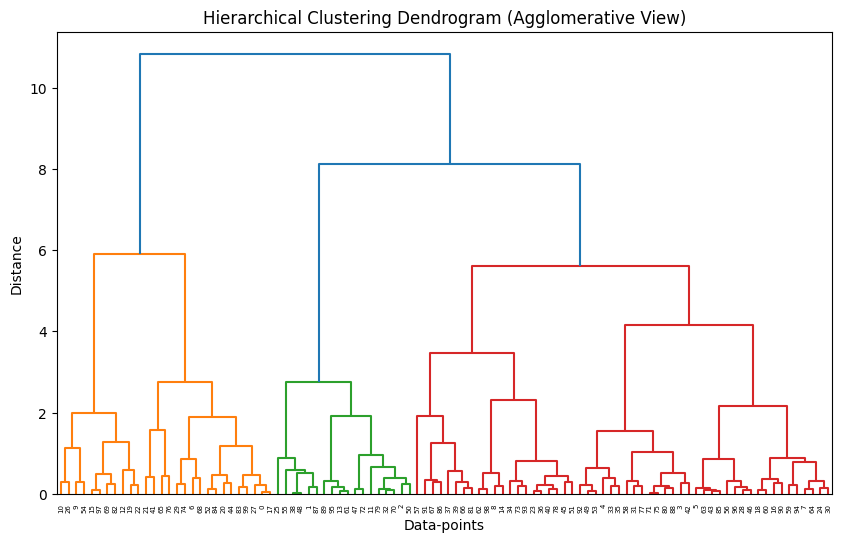

In [15]:
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Assuming X_scaled or features data
Z = linkage(X, method='ward')  # you can use 'average' or 'complete'

plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram (Agglomerative View)")
plt.xlabel("Data-points")
plt.ylabel("Distance")
plt.show()
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Conclusion:
# Hence,we succesfully implemented Divisive Hierarchial Clustering and visualised the distribution of data-points to see similarity and dissimilarity between data-points.
# We also visualised Hierarchial Clustering Dendrogram (Agglomerative View) to analyse how a single cluster is get distributed among different clusters further.

#Workflow of Divisive Clustering
#Start with all data points: Begin with one big group ABCDEFGH(For example).
#First split: Divide it into two groups ABC and DEFGH.
#Split again: The group ABC is divided into A and BC while the group DEFGH is split into DEFG and H.
#Keep dividing: We continue dividing these new groups. BC is split into B and C, DEFG is divided into DE and so on. At this stage most of the data points are now in their individual groups.
#Finish: Stop when all points are separated.